In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lets create synthetic Data Points
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=1000, n_features=2,n_targets=1, noise=3.0)

In [5]:
X

array([[ 1.21369417, -0.32294413],
       [ 1.8908131 ,  0.42002546],
       [-0.59309509,  1.20201858],
       ...,
       [ 1.22696949, -0.53458787],
       [ 0.18654324,  0.00561467],
       [ 0.28028567, -1.68096825]])

In [6]:
y

array([ 6.36297882e+01,  1.47118659e+02,  2.76343983e+01, -4.54465241e+01,
       -6.65783859e+01,  3.76049510e+01,  9.70700468e+01, -2.59614116e+01,
        7.05459781e+01,  6.45833841e+01,  1.64450550e+01,  3.61650487e+01,
        2.56522957e+01, -6.35919131e+00, -7.85304551e+01, -1.99820920e+02,
       -8.83466236e+01,  7.47703128e+01,  7.57705644e+01,  1.76808969e+02,
       -7.24388604e+01, -9.26290520e+01, -1.07646599e+02,  3.02099009e+01,
       -4.26475681e+01, -1.65803565e+00,  3.59827993e+01, -1.51955530e+02,
        1.00254284e+02,  1.82283710e+01,  9.96935870e+01, -6.70991929e+01,
        4.44141494e+01, -1.68438814e+02, -5.55451926e+01, -5.36383364e-01,
        4.86596846e+01,  1.31187923e+00, -2.18808937e+01,  1.90860506e+02,
       -9.96720038e+01,  1.20792875e+02,  2.68482795e+01, -1.42883648e+01,
        1.65318191e+02, -5.82688626e+01, -3.81106796e+01, -9.20635314e+00,
       -4.40355952e+01, -4.65866968e+01, -1.50206667e+02, -1.35229495e+02,
        1.29024606e+02, -

<Axes: xlabel='0', ylabel='1'>

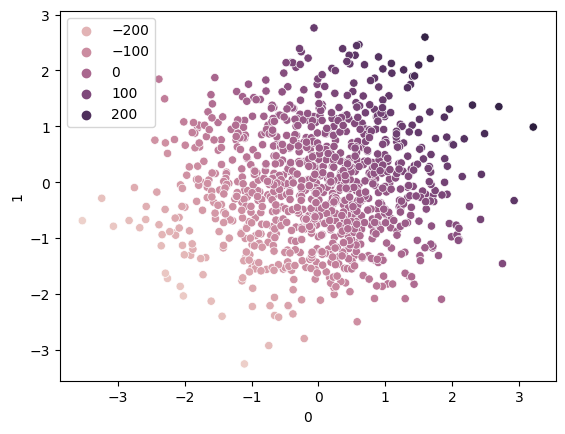

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=42 )

In [10]:
from sklearn.svm import SVR

In [13]:
svr=SVR(kernel='linear')

In [15]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [16]:
svr.coef_

array([[65.13610413, 58.56339034]])

In [17]:
y_pred=svr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))

0.9990165899332706


# Hyperparameters Tuning with SVC

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear'],
            'epsilon':[0.1,0.2,0.3]
}

In [24]:
Grid=GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [25]:
Grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.773 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.761 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.757 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.773 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.761 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [26]:
Grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [27]:
y_pred= Grid.predict(X_test)

In [31]:
r2_score(y_pred, y_test)

0.9990397534882275